In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
x = [2, 3, 5, 8, 10, 13]
y = [6, 1, 4, 7, 2, 3]

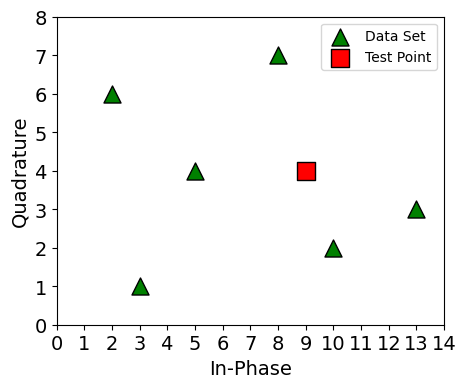

In [4]:
plt.figure(figsize=(5, 4))
plt.scatter(x, y, s=150, marker='^', c='green', edgecolors='k', label='Data Set', zorder=3, clip_on=False)
plt.scatter(9, 4, s=150, marker='s', c='red', edgecolors='k', label='Test Point', zorder=3, clip_on=False)
# plt.vlines(5, 0, 8, linestyles='dashed', colors='orange')
# plt.vlines(3, 0, 6, linestyles='dashed', colors='orange')
# plt.vlines(8, 3, 8, linestyles='dashed', colors='orange')
# plt.vlines(10, 0, 3, linestyles='dashed', colors='orange')
# plt.hlines(6, 0, 5, linestyles='dashed', colors='blue')
# plt.hlines(3, 5, 14, linestyles='dashed', colors='blue')
# plt.scatter(9, 4, s=20000, marker='o', edgecolors='k', zorder=3, clip_on=False, facecolor='none')
plt.xlabel('In-Phase', fontsize=14)
plt.ylabel('Quadrature', fontsize=14)
plt.xticks(np.arange(0, 15), fontsize=14)
plt.yticks(np.arange(0, 9), fontsize=14)
plt.xlim(0, 14)
plt.ylim(0, 8)
plt.legend(loc='best')
plt.savefig('para-el-TG.svg', bbox_inches='tight', pad_inches=0, format='svg')
plt.show()

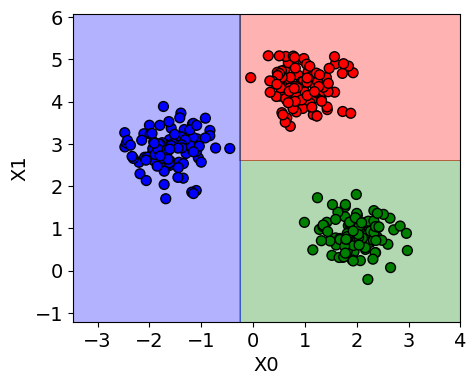

In [22]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.4)

tree = DecisionTreeClassifier(criterion='entropy').fit(X, y)

def generate_mesh(X, model, alpha=0.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, alpha),
                         np.arange(y_min, y_max, alpha))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

xx, yy, Z = generate_mesh(X, tree)

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'brown', 'orange', 'purple', 'pink']

plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, cmap=ListedColormap(colors[:3]), alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors[:3]), s=50, edgecolors='k')
plt.xlabel('X0', fontsize=14)
plt.ylabel('X1', fontsize=14)
plt.xticks(np.arange(-3, 5), fontsize=14)
plt.yticks(np.arange(-1, 7), fontsize=14)
plt.savefig('blobs.svg', bbox_inches='tight', pad_inches=0, format='svg')
plt.show()

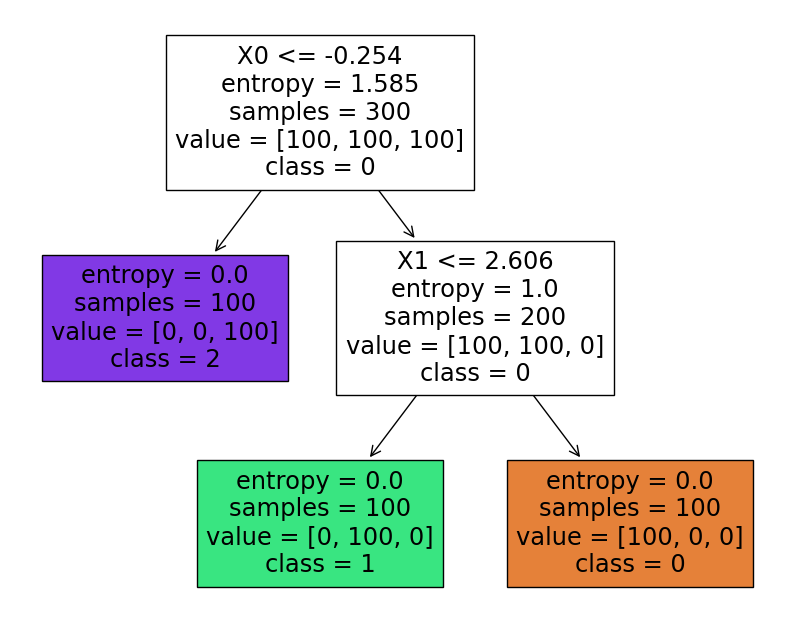

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(tree, filled=True, feature_names=['X0', 'X1'], class_names=['0', '1', '2'])
plt.savefig('decision_tree.svg', bbox_inches='tight', pad_inches=0, format='svg')
plt.show()